In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import scipy.io as sio
from numpy import expand_dims
from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from skimage.filters import gabor_kernel
from scipy import ndimage as nd        
import matplotlib
import matplotlib.pyplot as plt    
from numpy.linalg import norm
from keras.optimizers import SGD, Adam, Adagrad
import graphviz
import pydot

In [9]:
data_path = 'E:/Sushree/Dataset/'

img_path = os.path.join(data_path,'Animals_with_Attributes2/JPEGImages/')
print(img_path)

print(len(os.listdir(img_path)))

def get_imlist(path, option):
    if option == 'jpg':
        return[os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
def prepare_dataset(img_path, width, height, option):
    folder_list = os.listdir(img_path)
    num_classes = len(folder_list)
    images = []
    labels = []
    for i in range(len(folder_list)):
        print(i)
        img_list = get_imlist(os.path.join(img_path, folder_list[i]), option)
        for j in range(len(img_list)):
            img = image.load_img(img_list[j], target_size = (width, height))
            img = np.array(img)
            #img = np.true_divide(img,[255.0], out = None)
            img = np.divide(np.subtract(img, np.mean(img)), np.std(img))
            x = image.img_to_array(img)
            images.append(x)
            labels.append(i)
    images = np.array(images, dtype = np.float32)                             
    #labels = to_categorical(labels, num_classes)                             
    return images, labels  


width, height, ch = 224, 224, 3
images, labels = prepare_dataset(img_path, width, height,'jpg')

print(images.shape)
print(len(labels))

E:/Sushree/Dataset/Animals_with_Attributes2/JPEGImages/
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
(37322, 224, 224, 3)
37322


In [3]:
from numpy import reshape
x_images = reshape(images, [images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]])
print(x_images.shape)


(37322, 150528)


In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_images) 
 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 37322 samples in 2.795s...
[t-SNE] Computed neighbors for 37322 samples in 1651.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37322
[t-SNE] Computed conditional probabilities for sample 2000 / 37322
[t-SNE] Computed conditional probabilities for sample 3000 / 37322
[t-SNE] Computed conditional probabilities for sample 4000 / 37322
[t-SNE] Computed conditional probabilities for sample 5000 / 37322
[t-SNE] Computed conditional probabilities for sample 6000 / 37322
[t-SNE] Computed conditional probabilities for sample 7000 / 37322
[t-SNE] Computed conditional probabilities for sample 8000 / 37322
[t-SNE] Computed conditional probabilities for sample 9000 / 37322
[t-SNE] Computed conditional probabilities for sample 10000 / 37322
[t-SNE] Computed conditional probabilities for sample 11000 / 37322
[t-SNE] Computed conditional probabilities for sample 12000 / 37322
[t-SNE] Computed conditional probabilities for 

In [5]:
print(z.shape)


(37322, 2)


[Text(0.5, 1.0, 'T-SNE projection')]

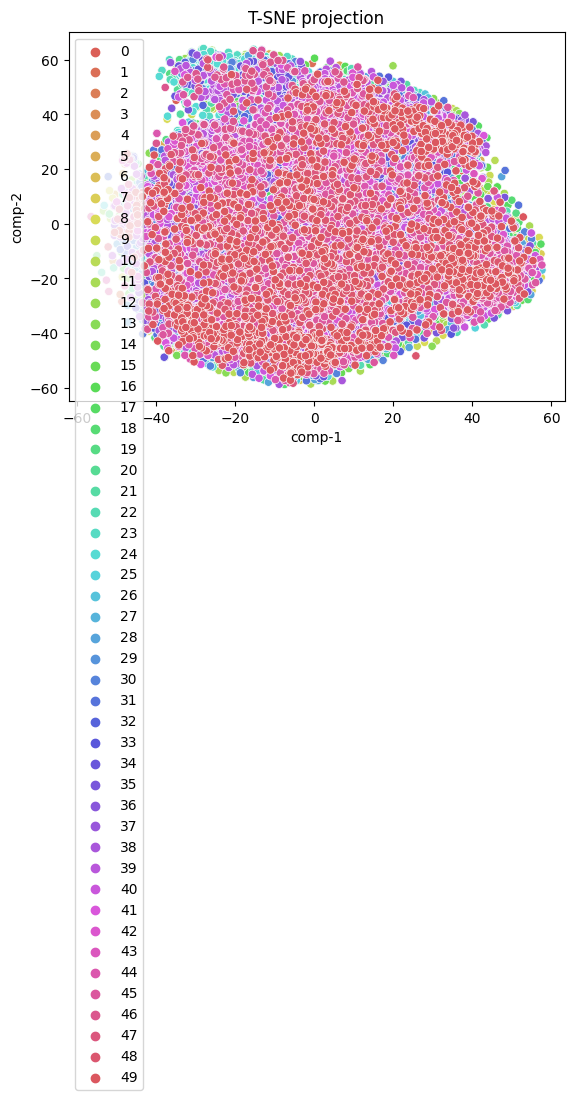

In [6]:
import pandas as pd  
import seaborn as sns
df = pd.DataFrame()
df["y"] = labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")



In [10]:
split_path = os.path.join(data_path,'data/xlsa17/data/AWA2/att_splits.mat')
matcontent = sio.loadmat(split_path)
trainval_loc = matcontent['trainval_loc'].squeeze() - 1


print(trainval_loc, len(trainval_loc))

train_images = images[trainval_loc]

train_labels = np.zeros(len(trainval_loc))
for i in range(len(trainval_loc)):
    train_labels[i] = labels[trainval_loc[i]]
    
print(train_images.shape)
print(len(train_labels))

[21482 11452 21448 ...  7992 10388  5160] 23527
(23527, 224, 224, 3)
23527


In [25]:
x_images = reshape(train_images, [train_images.shape[0], train_images.shape[1]*train_images.shape[2]*train_images.shape[3]])
print(x_images.shape)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_images) 

(23527, 150528)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23527 samples in 1.782s...
[t-SNE] Computed neighbors for 23527 samples in 633.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23527
[t-SNE] Computed conditional probabilities for sample 2000 / 23527
[t-SNE] Computed conditional probabilities for sample 3000 / 23527
[t-SNE] Computed conditional probabilities for sample 4000 / 23527
[t-SNE] Computed conditional probabilities for sample 5000 / 23527
[t-SNE] Computed conditional probabilities for sample 6000 / 23527
[t-SNE] Computed conditional probabilities for sample 7000 / 23527
[t-SNE] Computed conditional probabilities for sample 8000 / 23527
[t-SNE] Computed conditional probabilities for sample 9000 / 23527
[t-SNE] Computed conditional probabilities for sample 10000 / 23527
[t-SNE] Computed conditional probabilities for sample 11000 / 23527
[t-SNE] Computed conditional probabilities for sample 12000 / 23527
[t-SNE] Computed conditional pro

In [26]:
print(z.shape)


(23527, 2)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2856\2641988144.py:6: UserWarning: The palette list has more values (50) than needed (40), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


[Text(0.5, 1.0, 'T-SNE projection')]

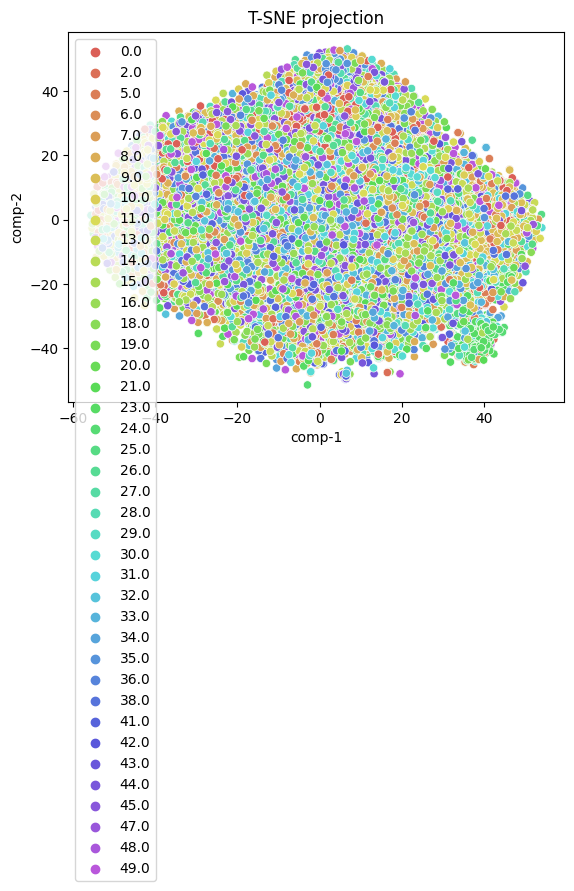

In [27]:

df = pd.DataFrame()
df["y"] = train_labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


In [4]:
model = tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

model.summary()

# define new_model, with an additional dense(1024) layer after global average pooling  
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
pred = Dense(50, activation='softmax')(x)

new_model = Model(inputs = model.input, outputs = pred)
new_model.summary()


for layer in new_model.layers:
    layer.trainable = True
    

sgd = SGD(learning_rate = 1e-2, decay = 1e-6, momentum = 0.9, nesterov = True)
new_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                       

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block9_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, None, None,   0          ['conv4_block9_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block11_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      1024)                                                             
                                                                                                  
 conv4_block14_add (Add)        (None, None, None,   0           ['conv4_block13_out[0][0]',      
                                1024)                             'conv4_block14_3_bn[0][0]']     
                                                                                                  
 conv4_block14_out (Activation)  (None, None, None,   0          ['conv4_block14_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block14_out[0][0]']      
                                256)                                                              
          

 conv4_block17_2_relu (Activati  (None, None, None,   0          ['conv4_block17_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block17_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block17_add (Add)        (None, None, None,   0           ['conv4_block16_out[0][0]',      
          

                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block20_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block20_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block23_1_relu[0][0]']   
                                256)                                                              
          

 conv5_block2_3_conv (Conv2D)   (None, None, None,   1050624     ['conv5_block2_2_relu[0][0]']    
                                2048)                                                             
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, None, None,   8192       ['conv5_block2_3_conv[0][0]']    
 ization)                       2048)                                                             
                                                                                                  
 conv5_block2_add (Add)         (None, None, None,   0           ['conv5_block1_out[0][0]',       
                                2048)                             'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, None, None,   0           ['conv5_block2_add[0][0]']       
          

                                                                                                  
 conv2_block1_2_relu (Activatio  (None, None, None,   0          ['conv2_block1_2_bn[0][0]']      
 n)                             64)                                                               
                                                                                                  
 conv2_block1_0_conv (Conv2D)   (None, None, None,   16640       ['pool1_pool[0][0]']             
                                256)                                                              
                                                                                                  
 conv2_block1_3_conv (Conv2D)   (None, None, None,   16640       ['conv2_block1_2_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block1_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block1_1_relu[0][0]']    
                                128)                                                              
          

 conv3_block3_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block3_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, None, None,   2048       ['conv3_block3_3_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv3_block3_add (Add)         (None, None, None,   0           ['conv3_block2_out[0][0]',       
                                512)                              'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block3_out (Activation)  (None, None, None,   0           ['conv3_block3_add[0][0]']       
          

                                                                                                  
 conv4_block2_1_relu (Activatio  (None, None, None,   0          ['conv4_block2_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block2_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block2_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block4_out[0][0]']       
                                256)                                                              
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, None, None,   0          ['conv4_block5_1_bn[0][0]']      
 n)                             256)                                                              
          

 conv4_block7_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block7_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block7_add (Add)         (None, None, None,   0           ['conv4_block6_out[0][0]',       
                                1024)                             'conv4_block7_3_bn[0][0]']      
                                                                                                  
 conv4_block7_out (Activation)  (None, None, None,   0           ['conv4_block7_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block7_out[0][0]']       
          

                                                                                                  
 conv4_block10_2_relu (Activati  (None, None, None,   0          ['conv4_block10_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block10_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block10_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block10_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block13_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block13_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block13_2_relu (Activati  (None, None, None,   0          ['conv4_block13_2_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block15_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block16_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block18_add (Add)        (None, None, None,   0           ['conv4_block17_out[0][0]',      
                                1024)                             'conv4_block18_3_bn[0][0]']     
                                                                                                  
 conv4_block18_out (Activation)  (None, None, None,   0          ['conv4_block18_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block19_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block18_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block21_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block21_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block21_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block21_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block21_add (Add)        (None, None, None,   0           ['conv4_block20_out[0][0]',      
                                1024)                             'conv4_block21_3_bn[0][0]']     
          

 conv5_block1_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block1_1_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, None, None,   2048       ['conv5_block1_2_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block1_2_relu (Activatio  (None, None, None,   0          ['conv5_block1_2_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block1_0_conv (Conv2D)   (None, None, None,   2099200     ['conv4_block23_out[0][0]']      
          

                                                                                                  
 conv5_block3_out (Activation)  (None, None, None,   0           ['conv5_block3_add[0][0]']       
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 alAveragePooling2D)                                                                              
                                                                                                  
 dense (Dense)                  (None, 1024)         2098176     ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
 dense_1 (

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

batch_size = 16
train_gen = DataGenerator(X_train, y_train, batch_size)   
val_gen = DataGenerator(X_val, y_val, batch_size)

In [31]:
name = 'ResNet101_AWA2_224_finetune_200eph_16bch_1e-2lr'
save_path = 'C:/Users/Admin/Sushree_Codes/Sush/Results/'

new_model.load_weights(save_path + 'Wt_' + name + '.h5')

train_all_gen = DataGenerator(train_images, train_labels, batch_size)  

feature_extractor_model1 = Model(inputs = [new_model.input], outputs = [new_model.layers[-3].output])
feature_extractor_model1.summary()

train_visual_features1 = feature_extractor_model1.predict(train_all_gen, steps = len(train_images)//batch_size, verbose = 1)
print(train_visual_features1, train_visual_features1.shape)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block9_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, None, None,   0          ['conv4_block9_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block11_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      1024)                                                             
                                                                                                  
 conv4_block14_add (Add)        (None, None, None,   0           ['conv4_block13_out[0][0]',      
                                1024)                             'conv4_block14_3_bn[0][0]']     
                                                                                                  
 conv4_block14_out (Activation)  (None, None, None,   0          ['conv4_block14_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block14_out[0][0]']      
                                256)                                                              
          

 conv4_block17_2_relu (Activati  (None, None, None,   0          ['conv4_block17_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block17_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block17_add (Add)        (None, None, None,   0           ['conv4_block16_out[0][0]',      
          

                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block20_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block20_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block23_1_relu[0][0]']   
                                256)                                                              
          

 conv5_block2_3_conv (Conv2D)   (None, None, None,   1050624     ['conv5_block2_2_relu[0][0]']    
                                2048)                                                             
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, None, None,   8192       ['conv5_block2_3_conv[0][0]']    
 ization)                       2048)                                                             
                                                                                                  
 conv5_block2_add (Add)         (None, None, None,   0           ['conv5_block1_out[0][0]',       
                                2048)                             'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, None, None,   0           ['conv5_block2_add[0][0]']       
          

In [32]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(train_visual_features1) 

print(z.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23520 samples in 0.028s...
[t-SNE] Computed neighbors for 23520 samples in 10.003s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23520
[t-SNE] Computed conditional probabilities for sample 2000 / 23520
[t-SNE] Computed conditional probabilities for sample 3000 / 23520
[t-SNE] Computed conditional probabilities for sample 4000 / 23520
[t-SNE] Computed conditional probabilities for sample 5000 / 23520
[t-SNE] Computed conditional probabilities for sample 6000 / 23520
[t-SNE] Computed conditional probabilities for sample 7000 / 23520
[t-SNE] Computed conditional probabilities for sample 8000 / 23520
[t-SNE] Computed conditional probabilities for sample 9000 / 23520
[t-SNE] Computed conditional probabilities for sample 10000 / 23520
[t-SNE] Computed conditional probabilities for sample 11000 / 23520
[t-SNE] Computed conditional probabilities for sample 12000 / 23520
[t-SNE] Computed conditional probabilities for sa

C:\Users\Admin\AppData\Local\Temp\ipykernel_2856\3723351973.py:6: UserWarning: The palette list has more values (50) than needed (40), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


[Text(0.5, 1.0, 'T-SNE projection')]

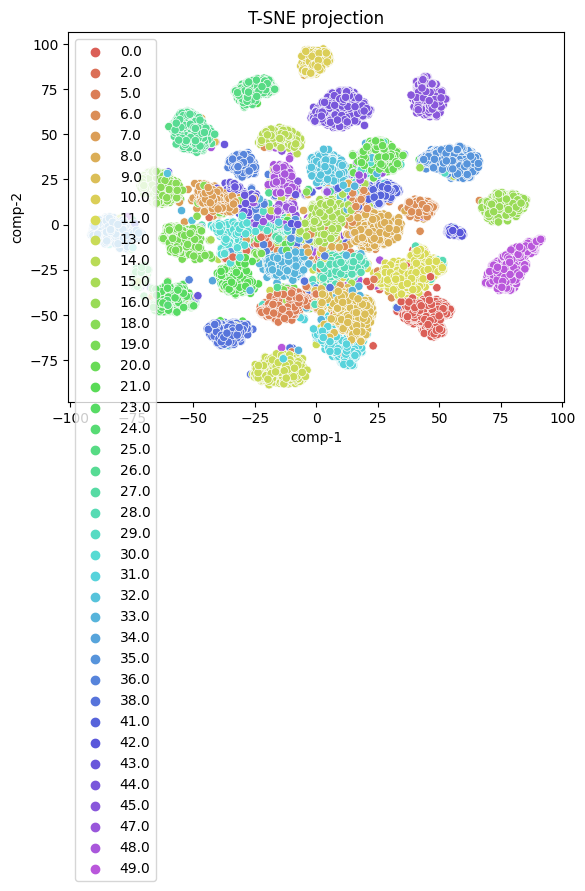

In [33]:
df = pd.DataFrame()
df["y"] = train_labels[0:23520]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


In [8]:
name = 'ResNet101_AWA2_224_finetune_200eph_16bch_1e-2lr'
save_path = 'C:/Users/Admin/Sushree_Codes/Sush/Results/'

new_model.load_weights(save_path + 'Wt_' + name + '.h5')

train_all_gen = DataGenerator(train_images, train_labels, batch_size)  

feature_extractor_model1 = Model(inputs = [new_model.input], outputs = [new_model.layers[-3].output])
feature_extractor_model1.summary()

train_visual_features1 = feature_extractor_model1.predict(train_all_gen, steps = len(train_images)//batch_size, verbose = 1)
print(train_visual_features1, train_visual_features1.shape)


x = new_model.get_layer('conv5_block2_out').output
out = GlobalAveragePooling2D()(x)

feature_extractor_model2 = Model(inputs = new_model.input, outputs = out)
feature_extractor_model2.summary()

train_visual_features2 = feature_extractor_model2.predict(train_all_gen, steps = len(train_images)//batch_size, verbose = 1)
print(train_visual_features2, train_visual_features2.shape)


x = new_model.get_layer('conv5_block1_out').output
out = GlobalAveragePooling2D()(x)

feature_extractor_model3 = Model(inputs = new_model.input, outputs = out)
feature_extractor_model3.summary()

train_visual_features3 = feature_extractor_model3.predict(train_all_gen, steps = len(train_images)//batch_size, verbose = 1)
print(train_visual_features3, train_visual_features3.shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block9_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, None, None,   0          ['conv4_block9_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block11_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      1024)                                                             
                                                                                                  
 conv4_block14_add (Add)        (None, None, None,   0           ['conv4_block13_out[0][0]',      
                                1024)                             'conv4_block14_3_bn[0][0]']     
                                                                                                  
 conv4_block14_out (Activation)  (None, None, None,   0          ['conv4_block14_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block14_out[0][0]']      
                                256)                                                              
          

 conv4_block17_2_relu (Activati  (None, None, None,   0          ['conv4_block17_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block17_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block17_add (Add)        (None, None, None,   0           ['conv4_block16_out[0][0]',      
          

                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block20_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block20_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block23_1_relu[0][0]']   
                                256)                                                              
          

 conv5_block2_3_conv (Conv2D)   (None, None, None,   1050624     ['conv5_block2_2_relu[0][0]']    
                                2048)                                                             
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, None, None,   8192       ['conv5_block2_3_conv[0][0]']    
 ization)                       2048)                                                             
                                                                                                  
 conv5_block2_add (Add)         (None, None, None,   0           ['conv5_block1_out[0][0]',       
                                2048)                             'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, None, None,   0           ['conv5_block2_add[0][0]']       
          

                                                                                                  
 conv2_block1_1_relu (Activatio  (None, None, None,   0          ['conv2_block1_1_bn[0][0]']      
 n)                             64)                                                               
                                                                                                  
 conv2_block1_2_conv (Conv2D)   (None, None, None,   36928       ['conv2_block1_1_relu[0][0]']    
                                64)                                                               
                                                                                                  
 conv2_block1_2_bn (BatchNormal  (None, None, None,   256        ['conv2_block1_2_conv[0][0]']    
 ization)                       64)                                                               
                                                                                                  
 conv2_blo

 ization)                       256)                                                              
                                                                                                  
 conv2_block3_add (Add)         (None, None, None,   0           ['conv2_block2_out[0][0]',       
                                256)                              'conv2_block3_3_bn[0][0]']      
                                                                                                  
 conv2_block3_out (Activation)  (None, None, None,   0           ['conv2_block3_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   32896       ['conv2_block3_out[0][0]']       
                                128)                                                              
          

 conv3_block3_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block3_1_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block3_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, None, None,   0          ['conv3_block3_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_out (Activation)  (None, None, None,   0           ['conv4_block1_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block1_out[0][0]']       
                                256)                                                              
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block2_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block4_add (Add)         (None, None, None,   0           ['conv4_block3_out[0][0]',       
                                1024)                             'conv4_block4_3_bn[0][0]']      
                                                                                                  
 conv4_block4_out (Activation)  (None, None, None,   0           ['conv4_block4_add[0][0]']       
                                1024)                                                             
          

 conv4_block7_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block7_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, None, None,   0          ['conv4_block7_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block7_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block7_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block7_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block10_1_relu (Activati  (None, None, None,   0          ['conv4_block10_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block10_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block10_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block13_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block12_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block13_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block13_1_relu (Activati  (None, None, None,   0          ['conv4_block13_1_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block15_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block15_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block15_add (Add)        (None, None, None,   0           ['conv4_block14_out[0][0]',      
                                1024)                             'conv4_block15_3_bn[0][0]']     
                                                                                                  
 conv4_block15_out (Activation)  (None, None, None,   0          ['conv4_block15_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block15_out[0][0]']      
          

                                                                                                  
 conv4_block18_2_relu (Activati  (None, None, None,   0          ['conv4_block18_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block18_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block18_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block18_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block18_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block21_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block21_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block21_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block21_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block21_2_relu (Activati  (None, None, None,   0          ['conv4_block21_2_bn[0][0]']     
 on)                            256)                                                              
          

 conv5_block1_1_conv (Conv2D)   (None, None, None,   524800      ['conv4_block23_out[0][0]']      
                                512)                                                              
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block1_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, None, None,   0          ['conv5_block1_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block1_1_relu[0][0]']    
          

 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, None, None,   256         ['conv1_conv[0][0]']             
                                64)                                                               
                                                                                                  
 conv1_relu (Activation)        (None, None, None,   0           ['conv1_bn[0][0]']               
          

                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, None, None,   256        ['conv2_block3_1_conv[0][0]']    
 ization)                       64)                                                               
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, None, None,   0          ['conv2_block3_1_bn[0][0]']      
 n)                             64)                                                               
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, None, None,   2048       ['conv3_block2_3_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv3_block2_add (Add)         (None, None, None,   0           ['conv3_block1_out[0][0]',       
                                512)                              'conv3_block2_3_bn[0][0]']      
          

 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_2_relu (Activatio  (None, None, None,   0          ['conv4_block1_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, None, None,   525312      ['conv3_block4_out[0][0]']       
          

                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_block4_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block3_out[0][0]']       
                                256)                                                              
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block4_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block6_add (Add)         (None, None, None,   0           ['conv4_block5_out[0][0]',       
                                1024)                             'conv4_block6_3_bn[0][0]']      
                                                                                                  
 conv4_block6_out (Activation)  (None, None, None,   0           ['conv4_block6_add[0][0]']       
                                1024)                                                             
          

 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, None, None,   0          ['conv4_block9_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block9_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block9_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block9_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block12_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block12_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block14_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block15_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block15_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block15_1_relu (Activati  (None, None, None,   0          ['conv4_block15_1_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block17_add (Add)        (None, None, None,   0           ['conv4_block16_out[0][0]',      
                                1024)                             'conv4_block17_3_bn[0][0]']     
                                                                                                  
 conv4_block17_out (Activation)  (None, None, None,   0          ['conv4_block17_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block17_out[0][0]']      
          

                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block20_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block20_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block20_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block23_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block23_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_2_relu (Activati  (None, None, None,   0          ['conv4_block23_2_bn[0][0]']     
 on)                            256)                                                              
          

In [9]:
train_visual_features = train_visual_features1 + train_visual_features2 + train_visual_features3
print(train_visual_features, train_visual_features.shape)


[[0.5491472  0.559044   1.1263405  ... 2.2208614  3.1659498  0.34384918]
 [0.77077603 1.9478551  0.8880949  ... 0.59579426 0.4052354  1.5435306 ]
 [1.0165584  0.19695285 0.02320311 ... 2.635389   2.0675728  0.07913448]
 ...
 [1.4169025  1.3560883  0.44094634 ... 1.3268322  2.773943   0.3214453 ]
 [1.3692559  0.4491553  1.6549034  ... 1.237817   0.44442296 0.13987145]
 [2.2720485  0.20447372 0.8964724  ... 1.2866143  2.3932068  0.2771904 ]] (23520, 2048)


In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(train_visual_features) 

print(z.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23520 samples in 0.029s...
[t-SNE] Computed neighbors for 23520 samples in 9.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23520
[t-SNE] Computed conditional probabilities for sample 2000 / 23520
[t-SNE] Computed conditional probabilities for sample 3000 / 23520
[t-SNE] Computed conditional probabilities for sample 4000 / 23520
[t-SNE] Computed conditional probabilities for sample 5000 / 23520
[t-SNE] Computed conditional probabilities for sample 6000 / 23520
[t-SNE] Computed conditional probabilities for sample 7000 / 23520
[t-SNE] Computed conditional probabilities for sample 8000 / 23520
[t-SNE] Computed conditional probabilities for sample 9000 / 23520
[t-SNE] Computed conditional probabilities for sample 10000 / 23520
[t-SNE] Computed conditional probabilities for sample 11000 / 23520
[t-SNE] Computed conditional probabilities for sample 12000 / 23520
[t-SNE] Computed conditional probabilities for sam

C:\Users\Admin\AppData\Local\Temp\ipykernel_18320\3731711898.py:8: UserWarning: The palette list has more values (50) than needed (40), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


[Text(0.5, 1.0, 'T-SNE projection')]

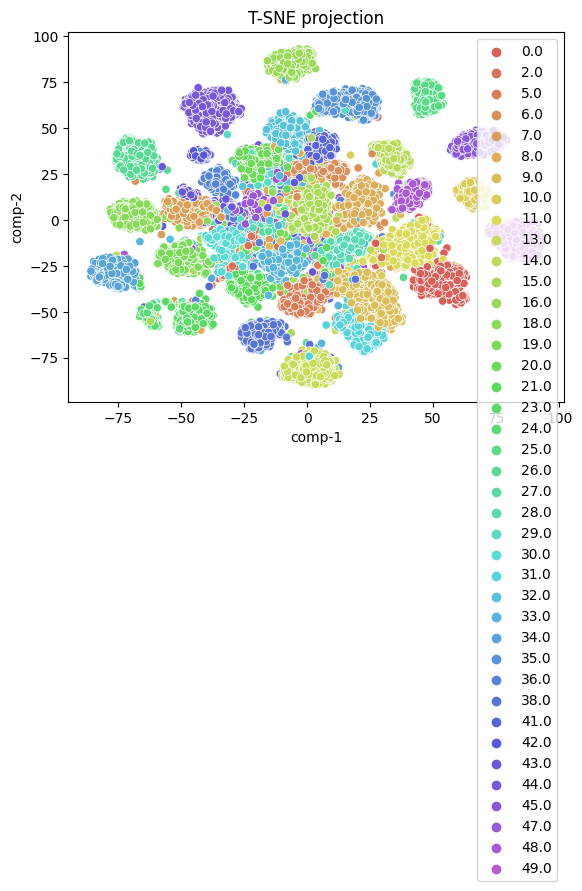

In [12]:
import pandas as pd  
import seaborn as sns
df = pd.DataFrame()
df["y"] = train_labels[0:23520]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


In [2]:

train_gabor_feature_transformed = np.load('C:/Users/Admin/Sushree_Codes/Sush/Results/transformed_gabor_features_dense_2048.npy')
print(train_gabor_feature_transformed, train_gabor_feature_transformed.shape)


[[ 0.12128699  0.1714684   0.09327443 ... -0.22257476 -0.0789879
   0.24663197]
 [ 0.02415382 -0.11808714  0.02814358 ...  0.05856087  0.00449371
   0.08509304]
 [-0.07248039  0.02478457 -0.01801182 ... -0.37423903  0.03677747
  -0.22551486]
 ...
 [-0.02271677 -0.02799692  0.05151584 ...  0.03339488 -0.11488006
  -0.01951144]
 [-0.00344384  0.20381     0.13336962 ... -0.13013028 -0.07593524
   0.04537195]
 [ 0.19128346 -0.00070702 -0.08745501 ...  0.06849919  0.02539712
   0.24146035]] (23520, 2048)


In [4]:
class FeatGenerator(Sequence):
    def __init__(self, x_set, batch_size):
        self.x = x_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x

num_features, feat_len = np.shape(train_gabor_feature_transformed)

feat = Input(shape = (feat_len))
flat = Flatten()(feat)

model_transform_handcrafted = Model(inputs = feat, outputs = flat)
model_transform_handcrafted.summary()

train_gabor_feature_gen = FeatGenerator(train_gabor_feature_transformed, batch_size = 16)
transformed_handcrafted_features = model_transform_handcrafted.predict(train_gabor_feature_gen, steps = len(train_gabor_feature_transformed)//batch_size, verbose = 1)

print(transformed_handcrafted_features, transformed_handcrafted_features.shape)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048)]            0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


NameError: name 'train_images' is not defined

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(train_gabor_feature_transformed) 

print(z.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23520 samples in 0.024s...
[t-SNE] Computed neighbors for 23520 samples in 9.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23520
[t-SNE] Computed conditional probabilities for sample 2000 / 23520
[t-SNE] Computed conditional probabilities for sample 3000 / 23520
[t-SNE] Computed conditional probabilities for sample 4000 / 23520
[t-SNE] Computed conditional probabilities for sample 5000 / 23520
[t-SNE] Computed conditional probabilities for sample 6000 / 23520
[t-SNE] Computed conditional probabilities for sample 7000 / 23520
[t-SNE] Computed conditional probabilities for sample 8000 / 23520
[t-SNE] Computed conditional probabilities for sample 9000 / 23520
[t-SNE] Computed conditional probabilities for sample 10000 / 23520
[t-SNE] Computed conditional probabilities for sample 11000 / 23520
[t-SNE] Computed conditional probabilities for sample 12000 / 23520
[t-SNE] Computed conditional probabilities for sam

In [7]:
data_path = 'E:/Sushree/Dataset/'

img_path = os.path.join(data_path,'Animals_with_Attributes2/JPEGImages/')
print(img_path)

print(len(os.listdir(img_path)))

def get_imlist(path, option):
    if option == 'jpg':
        return[os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
def prepare_labels(img_path, option):
    folder_list = os.listdir(img_path)
    num_classes = len(folder_list)
    labels = []
    for i in range(len(folder_list)):
        print(i)
        img_list = get_imlist(os.path.join(img_path, folder_list[i]), option)
        for j in range(len(img_list)):
            labels.append(i)
    return labels  

width, height, ch = 224, 224, 3
labels = prepare_labels(img_path, 'jpg')

print(len(labels))

E:/Sushree/Dataset/Animals_with_Attributes2/JPEGImages/
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
37322


In [9]:
split_path = os.path.join(data_path,'data/xlsa17/data/AWA2/att_splits.mat')
matcontent = sio.loadmat(split_path)
trainval_loc = matcontent['trainval_loc'].squeeze() - 1


print(trainval_loc, len(trainval_loc))

train_labels = np.zeros(len(trainval_loc))
for i in range(len(trainval_loc)):
    train_labels[i] = labels[trainval_loc[i]]
    
print(len(train_labels))

[21482 11452 21448 ...  7992 10388  5160] 23527
23527


C:\Users\Admin\AppData\Local\Temp\ipykernel_7004\3446206835.py:9: UserWarning: The palette list has more values (50) than needed (40), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


[Text(0.5, 1.0, 'T-SNE projection')]

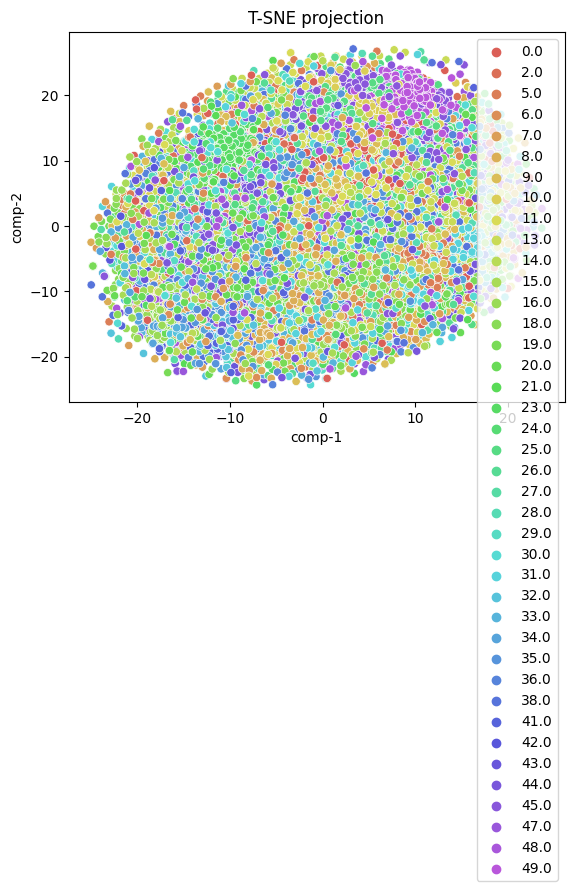

In [10]:
import pandas as pd  
import seaborn as sns

df = pd.DataFrame()
df["y"] = train_labels[0:23520]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


In [6]:
from gensim.models import Word2Vec

In [9]:


import gensim.downloader as api
import pandas as pd

print('Load pretrain w2v model')

model_name = 'word2vec-google-news-300'#best model
model = api.load(model_name)

dim_w2v = 300

#%%
replace_word = [('newworld','new world'),('oldworld','old world'),('nestspot','nest spot'),('toughskin','tough skin'),
                ('longleg','long leg'),('chewteeth','chew teeth'),('meatteeth','meat teeth'),('strainteeth','strain teeth'),
                ('quadrapedal','quadrupedal')]  # for AWA2


#For AWA2
path = 'E:/Sushree/Dataset/Animals_with_Attributes2/attribute/predicates.txt'
df=pd.read_csv(path,sep='\t',header = None, names = ['idx','des'])
des = df['des'].values

#%% replace out of dictionary (OOD) words
for pair in replace_word:
    for idx,s in enumerate(des):
        des[idx] = s.replace(pair[0],pair[1])
print('Done replacing OOD words')

df['new_des'] = des
df.to_csv('E:/Sushree/Dataset/Animals_with_Attributes2/attribute/new_des.csv')
print('Done preprocessing attribute des')

Load pretrain w2v model
Done replacing OOD words
Done preprocessing attribute des


In [11]:
import pickle
counter_err = 0

all_w2v = []
for s in des:
    print(s)
    words = s.split(' ')
    if words[-1] == '':     #remove empty element
        words = words[:-1]
    w2v = np.zeros(dim_w2v)
    for w in words:
        try:
            w2v += model[w]
        except Exception as e:
            print(e)
            counter_err += 1
    all_w2v.append(w2v[np.newaxis,:])
    
print('counter_err ',counter_err)

#%%
all_w2v=np.concatenate(all_w2v,axis=0)
#pdb.set_trace()
#%%

with open('E:/Sushree/Dataset/Animals_with_Attributes2/w2v/AWA2_attribute.pkl','wb') as f:
    pickle.dump(all_w2v,f)  

black
white
blue
brown
gray
orange
red
yellow
patches
spots
stripes
furry
hairless
tough skin
big
small
bulbous
lean
flippers
hands
hooves
pads
paws
long leg
longneck
tail
chew teeth
meat teeth
buckteeth
strain teeth
horns
claws
tusks
smelly
flys
hops
swims
tunnels
walks
fast
slow
strong
weak
muscle
bipedal
quadrupedal
active
inactive
nocturnal
hibernate
agility
fish
meat
plankton
vegetation
insects
forager
grazer
hunter
scavenger
skimmer
stalker
new world
old world
arctic
coastal
desert
bush
plains
forest
fields
jungle
mountains
ocean
ground
water
tree
cave
fierce
timid
smart
group
solitary
nest spot
domestic
counter_err  0


In [12]:
attribute_path = 'E:/Sushree/Dataset/Animals_with_Attributes2/w2v/AWA2_attribute.pkl'

with open(attribute_path,'rb') as f:
    w2v_att = pickle.load(f)
assert w2v_att.shape == (85,300) # for AWA2
print('save w2v_att')

print(w2v_att, w2v_att.shape)

save w2v_att
[[ 0.10498047  0.01843262  0.00897217 ...  0.09228516  0.06103516
  -0.1328125 ]
 [ 0.02697754  0.06933594  0.02416992 ...  0.06933594  0.06982422
  -0.03369141]
 [ 0.0390625   0.08642578  0.22363281 ...  0.04663086  0.02258301
  -0.15722656]
 ...
 [ 0.21289062  0.15039062 -0.14746094 ... -0.18652344 -0.10351562
   0.24609375]
 [-0.04574585  0.37304688 -0.51708984 ... -0.26953125  0.06518555
   0.38085938]
 [-0.29492188  0.15039062 -0.1484375  ...  0.11572266  0.07519531
   0.00210571]] (85, 300)


In [14]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(w2v_att) 

print(z.shape)

[t-SNE] Computing 84 nearest neighbors...
[t-SNE] Indexed 85 samples in 0.000s...
[t-SNE] Computed neighbors for 85 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 85 / 85
[t-SNE] Mean sigma: 1.342501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.006229
[t-SNE] KL divergence after 1000 iterations: 0.384126
(85, 2)


In [15]:
def prepare_labels_for_attributes(num_attributes):
    labels = []
    for i in range(num_attributes):
        print(i)
        labels.append(i)
                           
    return labels  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84


C:\Users\Admin\AppData\Local\Temp\ipykernel_22620\243397000.py:8: UserWarning: 
The palette list has fewer values (50) than needed (85) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


[Text(0.5, 1.0, 'T-SNE projection')]

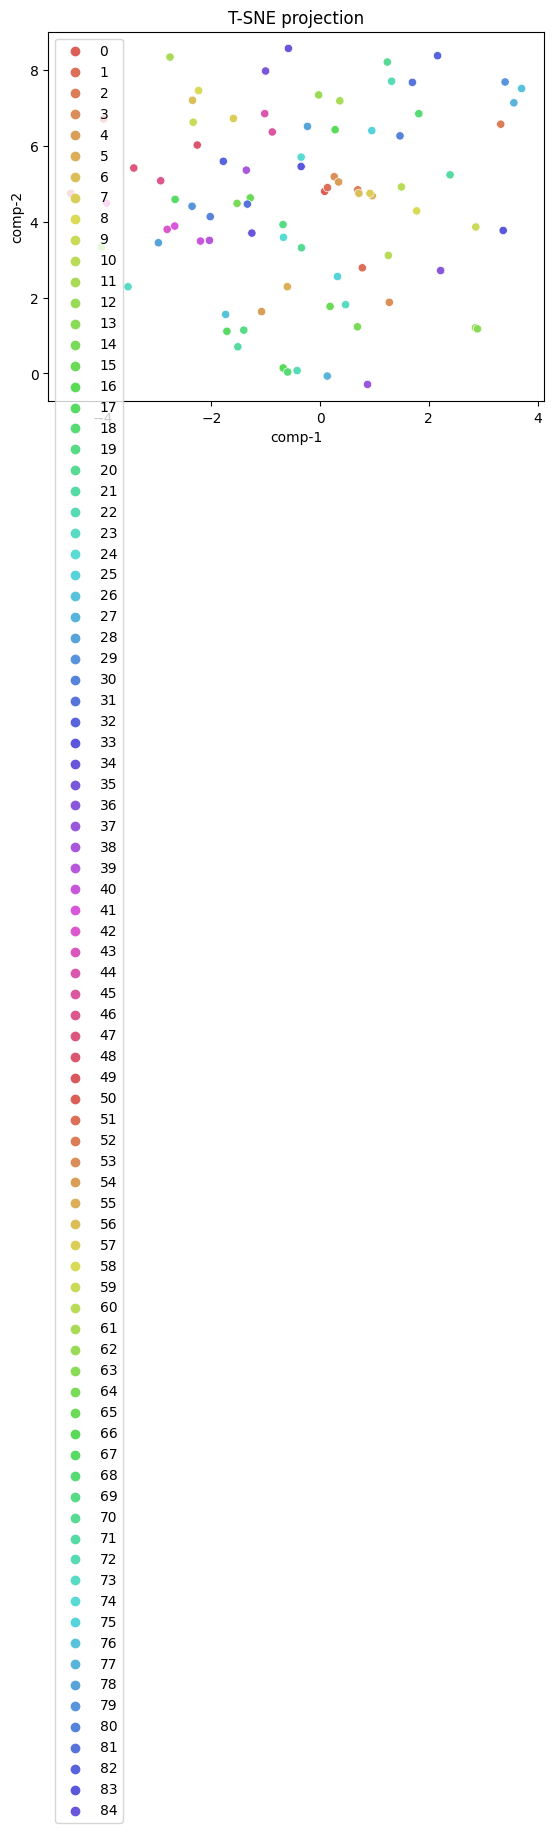

In [16]:
attribute_labels = prepare_labels_for_attributes(85)

df = pd.DataFrame()
df["y"] = attribute_labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")


In [19]:

split_path = 'E:/Sushree/Dataset/data/xlsa17/data/AWA2/att_splits.mat'
print(split_path)
matcontent = sio.loadmat(split_path)
    
att = matcontent['att'].T
print(att, att.shape)    

E:/Sushree/Dataset/data/xlsa17/data/AWA2/att_splits.mat
[[-0.00375358 -0.00375358 -0.00375358 ...  0.00882092  0.03640974
   0.03145501]
 [ 0.12045618  0.00426584  0.         ...  0.17996306  0.0618086
   0.03495531]
 [ 0.26584459  0.20652363  0.         ...  0.05026822  0.04274552
   0.04915256]
 ...
 [ 0.22516498  0.15266022  0.         ...  0.12733492  0.10009694
   0.01771   ]
 [ 0.19613947  0.1966714   0.         ...  0.01787277  0.06698743
   0.25883601]
 [ 0.03819588  0.08046548  0.10363715 ...  0.01479997  0.05250999
   0.14194515]] (50, 85)


In [20]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(att) 

print(z.shape)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.505208
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.601490
[t-SNE] KL divergence after 950 iterations: 0.112265
(50, 2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


[Text(0.5, 1.0, 'T-SNE projection')]

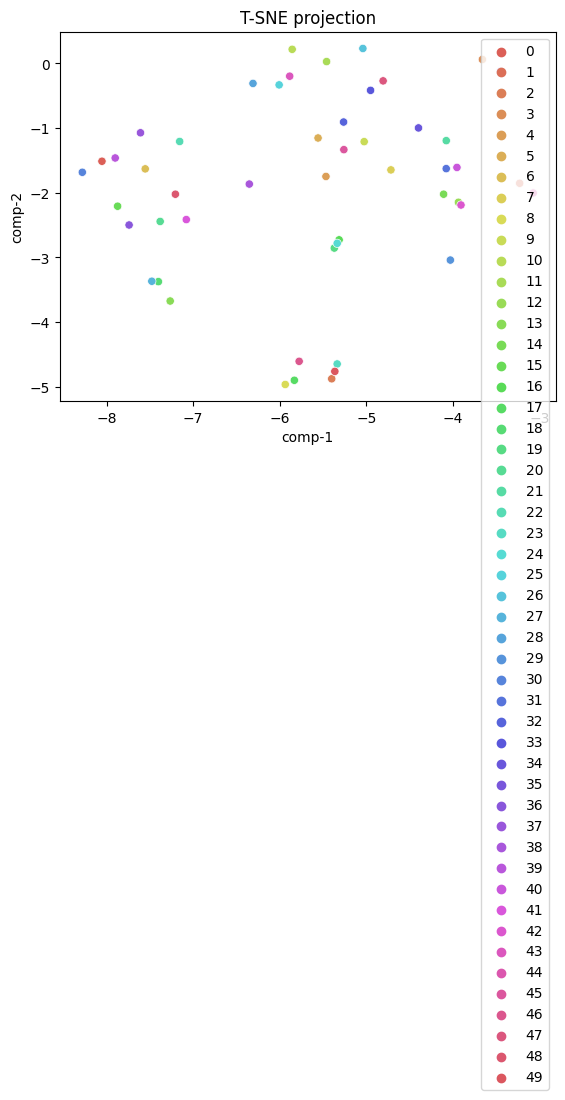

In [21]:
attribute_labels2 = prepare_labels_for_attributes(50)

df = pd.DataFrame()
df["y"] = attribute_labels2
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 50), data=df).set(title="T-SNE projection")
